### Examples of how to use matplotlib

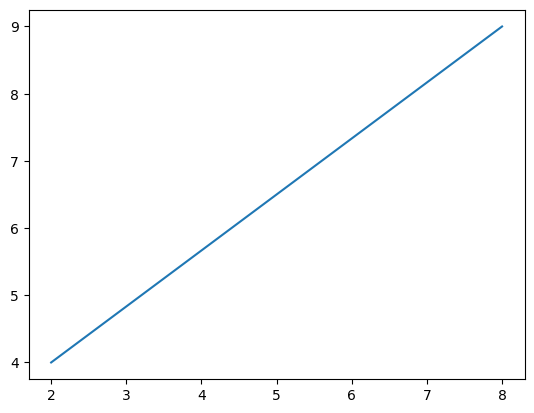

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# X axis parameter:
xaxis = np.array([2, 8])

# Y axis parameter:
yaxis = np.array([4, 9])

plt.plot(xaxis, yaxis)
plt.show()

KeyboardInterrupt: 

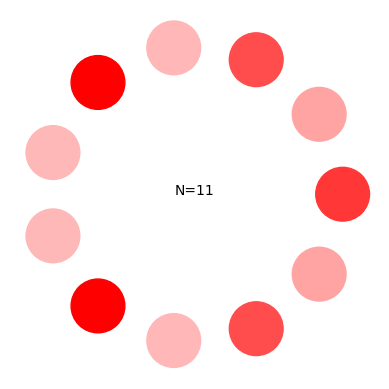

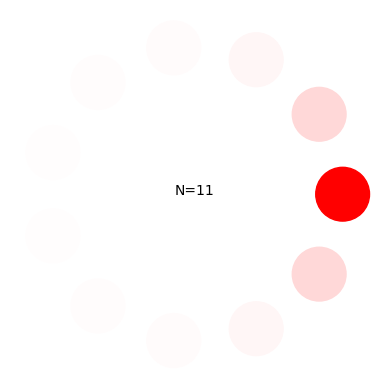

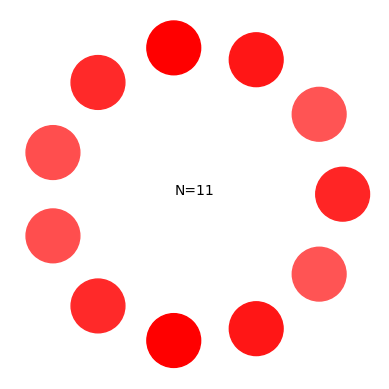

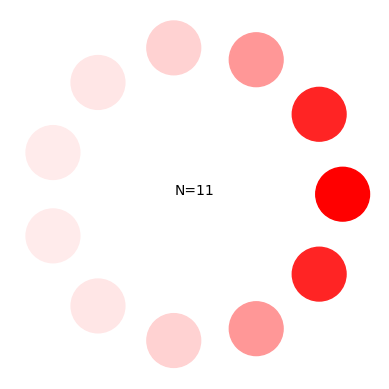

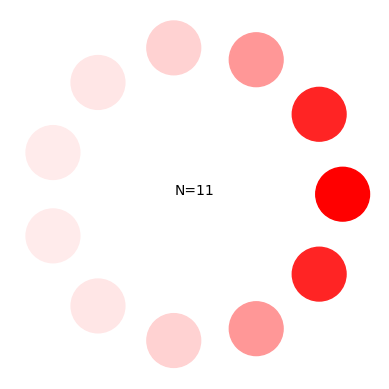

In [7]:
"""
Simulation for ring of N quantum harmonic oscillators
Note, this program as written assumes k=1, m=1 for each oscillator
"""

import numpy as np
import matplotlib.pyplot as plt
import os


def propagator(beg, fin, time, numb):  # Gives probability to find energy unit which
    # starts at position "beg" at position "fin" after
    # "time" with "numb" oscillators

    propArray = []

    for i in range(numb):
        kappa = i-(numb-1)/2
        propArray.append(1/numb*np.exp(2j*np.pi*kappa*(beg-fin)/numb)
                         * np.exp(-1j*numb/(2*np.pi)*np.sqrt(2*(1-np.cos(2*np.pi*kappa/numb)))*time))

    return abs(sum(propArray))


def draw_circles(n, t, label):

    fig, ax = plt.subplots()
    plt.axis('off')
    ax.set_xlim([-1.25, 1.25])
    ax.set_ylim([-1.25, 1.25])
    ax.set_aspect('equal')

    plt.text(0, 0, 'N={}'.format(n), ha='center')

    col = []

    for i in range(n):
        col.append(propagator(0, i, t, n))

    norm = max(col)

    for i in range(n):

        circle = plt.Circle((np.cos(2*np.pi*i/n), np.sin(2*np.pi*i/n)), rad,
                            color=(1, 1-col[i]/norm, 1-col[i]/norm))
        ax.add_artist(circle)

    filename = 'img{}'.format(label)

    if os.path.isdir('qftN{0}'.format(n)) == False:
        os.mkdir('qftN{0}'.format(n))

    if os.path.isfile('qftN{0}/{1}'.format(n, filename)) == True:
        os.remove('qftN{0}/{1}'.format(n, filename))

    fig.savefig('qftN{0}/{1}'.format(n, filename), dpi=500)

    plt.close(fig)


plt.ioff()
#plt.ion()

n = 11  # number of oscillators
rad = 2/n  # radius of each "dot," representing an oscillator

tmax = 20  # max time to run simulation

t = 0  # starting time

label = 1  # starting label for output images

while t < tmax:

    draw_circles(n, t, label)

    t += 0.1
    label += 1
